In [35]:
# develop-entropy-to-basin-sizes.ipynb
#
# Bryan Daniels / Enrico Borriello
# 2023/6/7
#
# Goal: function that produces a list of basin sizes that corresponds to a given basin entropy.
#

In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

In [2]:
def basin_entropy(w):
    # use masked array (ma) to avoid problems with zero
    return -np.dot(w,np.ma.log2(w).filled(0.))

In [3]:
def entropy_to_basin_sizes(h_tilde,r,tol=1e-3):
    if h_tilde > np.log2(r): 
        raise ValueError("Basin entropy cannot be larger than log2(r)")
    func = lambda w: (basin_entropy(w) - h_tilde)**2
    w0 = [ (i+1)/(r*(r+1)/2) for i in range(r) ]
    normConstraint = scipy.optimize.LinearConstraint(np.ones(r),lb=1.,ub=1.)
    bound = scipy.optimize.Bounds(lb=0.,ub=1.)
    solution = scipy.optimize.minimize(func,w0,constraints=normConstraint,bounds=bound)
    if solution.success and np.sqrt(solution.fun) < tol:
        return solution.x
    else:
        raise Exception("Solution not found within given tolerance")

In [4]:
w = entropy_to_basin_sizes(1.5,10)
basin_entropy(w)

1.5007503140006266

In [5]:
w = entropy_to_basin_sizes(1.5,100)
basin_entropy(w)

1.5004081155598512

In [6]:
w = entropy_to_basin_sizes(6.64,100)
basin_entropy(w)

6.6396455032376736

In [7]:
w = entropy_to_basin_sizes(0.001,100)
basin_entropy(w)

0.0011780867390330757

Text(0, 0.5, '$w_i$')

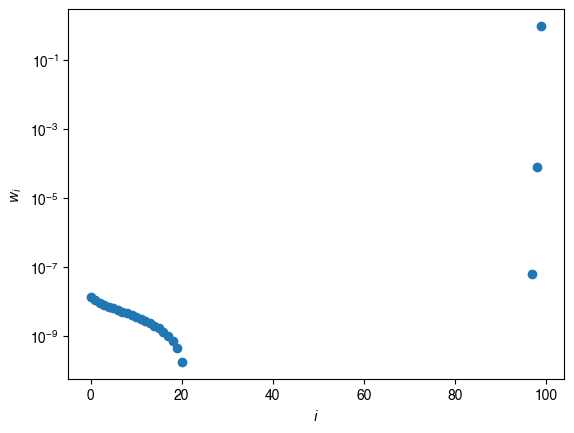

In [10]:
plt.plot(w,'o')
plt.yscale('log')
plt.xlabel('$i$')
plt.ylabel('$w_i$')

# old

In [ ]:
# max h is log2(r)

In [74]:
# try using `minimize` function
# r = len(w)
r = 50
h_tilde = 4.5
if h_tilde > np.log2(r): 
    raise ValueError("Basin entropy cannot be larger than log2(r)")
func = lambda w: (basin_entropy(w) - h_tilde)**2
w0 = [ (i+1)/(r*(r+1)/2) for i in range(r) ]
print("sum(w0) = {}".format(np.sum(w0)))
normConstraint = scipy.optimize.LinearConstraint(np.ones(r),lb=1.,ub=1.)
bound = scipy.optimize.Bounds(lb=0.,ub=1.)
solution = scipy.optimize.minimize(func,w0,constraints=normConstraint,bounds=bound)

sum(w0) = 1.0


In [76]:
basin_entropy(solution.x)

4.50030543769444

In [86]:
solution.status

0

Text(0, 0.5, '$w_i$')

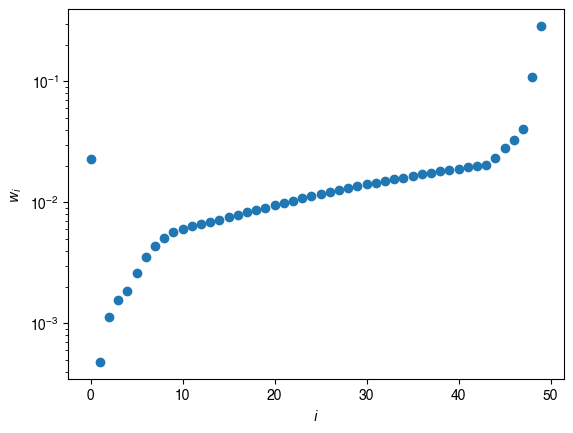

In [75]:
plt.plot(solution.x,'o')
plt.yscale('log')
plt.xlabel('$i$')
plt.ylabel('$w_i$')

In [17]:
# try using root-finding function
r = 5
h_tilde = 2
entropyFunc = lambda w: (basin_entropy(w) - h_tilde)**2
normFunc = lambda w: (np.dot(np.ones(r),w) - 1.)**2
rootFunc = lambda w: [entropyFunc(w),normFunc(w)]
w0 = [ 1./r for i in range(r) ]
scipy.optimize.root(rootFunc,w0)

TypeError: fsolve: there is a mismatch between the input and output shape of the 'func' argument '<lambda>'.Shape should be (5,) but it is (2,).